# Hardwork pays off

In [593]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## section 1 Load and vizualize data
* LOad
* vizualize
* normalize

In [594]:
dfx = pd.read_csv('./Training Data/Linear_X_Train.csv')
dfy = pd.read_csv('./Training Data/Linear_Y_Train.csv')

dfx.head()

,x
0,-0.289307
1,-0.588810
2,1.027507
3,-0.259013
4,0.782043


## vizualize

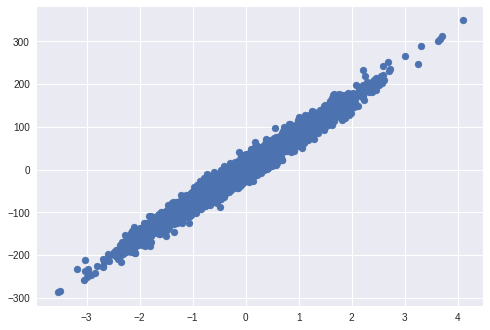

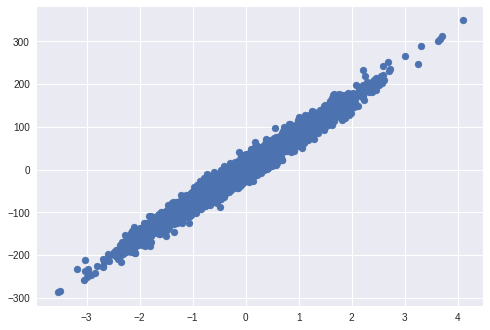

In [595]:
plt.scatter(x,y)
plt.show()
plt.style.use("seaborn")
plt.scatter(dfx,dfy)
plt.show()

## normalize

In [596]:
x = dfx.values
y = dfy.values
x = x.reshape((-1,))
y = y.reshape((-1,))
u  = x.mean()
std = x.std()

X = (x-u)/std
Y=y

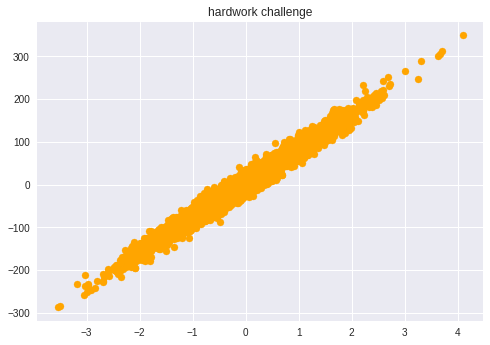

In [597]:
plt.style.use("seaborn")
plt.scatter(x,y,color = "orange")
plt.title("hardwork challenge")
plt.show()

## Section 2 :- Linear regression

In [676]:
def hypthesis(x,theta):
    # theta = [theta0, theta1]
    y_= theta[0]+theta[1]*x
    return y_
def gradient(X,Y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        y_ = hypthesis(X[i],theta)
        grad[0] += (y_ - Y[i])
        grad[1] += (y_ -Y[i])*X[i]
#     return grad
    return grad/m
def error(X,Y,theta):
    m = X.shape[0]
    total_error = 0.0

    for i in range(m):
        y_ = hypthesis(X[i],theta)
        total_error += (y_ - Y[i])**2
    return total_error/m
        

def gradientDescent(X,Y,max_steps=100,learning_rate = 0.1):
    theta = np.zeros((2,))
    error_list = []
    theta_list = []
    
    for i in range(max_steps):
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)    
        error_list.append(e)
        
        theta_list.append((theta[0],theta[1]))
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        
    return theta,error_list,theta_list

In [677]:
theta,error_list,theta_list = gradientDescent(X,Y)
print(theta)
print(error_list)

[ 0.6838508  79.90361453]
[6576.35005246196, 5363.125102574931, 4380.412893166487, 3584.4160035456366, 2939.658522952752, 2417.404963672508, 1994.3795806555281, 1651.7290204117544, 1374.1820666143055, 1149.3690340383696, 967.2704776518652, 819.770646978796, 700.2957841336078, 603.5211452290067, 525.1336877162773, 461.6398471309694, 410.20983625687, 368.55152744884856, 334.80829731435097, 307.47628090540843, 285.33734761416457, 267.4048116482566, 252.87945751587242, 241.11392066864, 231.5838358223823, 223.86446709691373, 217.61177842928484, 212.54710060850397, 208.4447115736724, 205.1217764554589, 202.43019900970543, 200.25002127864602, 198.48407731648712, 197.05366270713802, 195.8950268735658, 194.95653184837263, 194.19635087796493, 193.58060429193594, 193.08184955725244, 192.67785822215873, 192.35062524073192, 192.08556652577707, 191.87086896666273, 191.69696394378104, 191.55610087524585, 191.4420017897342, 191.34958153046787, 191.2747211204641, 191.21408418835912, 191.16496827335493,

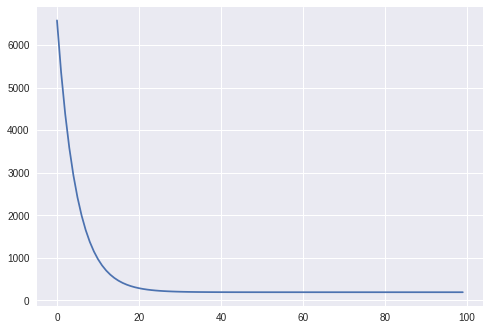

In [678]:
plt.plot(error_list)

In [679]:
x_test = pd.read_csv('./Test Cases/Linear_X_Test.csv')

In [680]:
x_test.head()

,x
0,-1.877944
1,-0.869032
2,-2.530182
3,2.760205
4,0.591000


In [681]:
pred = hypthesis(x_test.values,theta)

In [682]:
print(pred)

[[-149.37069577]
 [ -68.75494042]
 [-201.48687035]
 ...
 [  10.9121384 ]
 [ -21.53235759]
 [ -53.68460035]]


In [683]:
df = pd.DataFrame(pred[1])
df.to_csv("file.csv",index=False)

## Section 3:-  Predicting and Best Line

In [684]:
y_ = hypthesis(X,theta)
print(y_)

[-19.5733619  -43.69571729  86.4848761  ... -20.85044708 138.70197319
 -35.87897262]


#### training + prediction

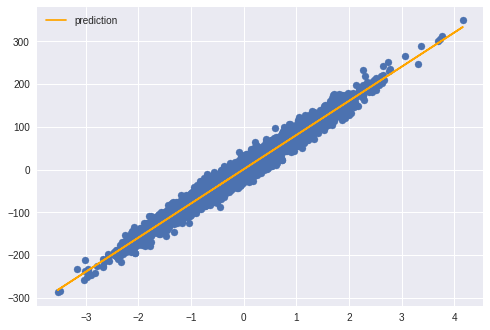

In [685]:
plt.scatter(X,y)
plt.plot(X,y_,color="orange",label="prediction")
plt.legend()
plt.show()

### Section 4:- Computing score

In [686]:
def r2_score(Y,Y_):
    num = np.sum((Y-Y_)**2)
    denom = np.sum((Y-Y.mean())**2)
    
    score = (1-num/denom)
    return score

In [687]:
r2_score(y,y_)

0.9709612226971643

### Section 5:- Visualisation loss function, gradient decent,theta updates

In [688]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

In [689]:
theta

array([ 0.6838508 , 79.90361453])

##### Loss Actually

In [690]:
T0 = np.arange(-50,50,1)
T1 = np.arange(40,120,1)

T0,T1 = np.meshgrid(T0,T1)

J = np.zeros(T0.shape)
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        y_ = T1[i,j]*X + T0[i,j]
        J[i,j] = np.sum((Y-y_)**2)/y.shape[0]

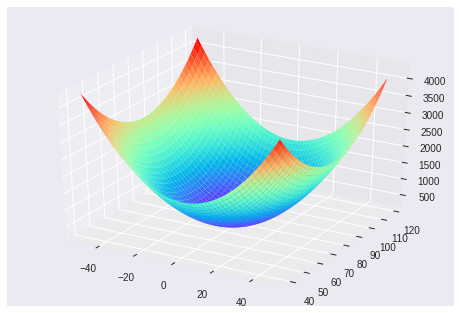

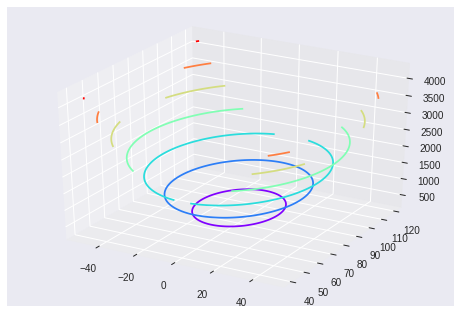

In [691]:
# visualise J (loss) Surface plot
fig = plt.figure()
axes = fig.gca(projection="3d")
axes.plot_surface(T0,T1,J,cmap = "rainbow")
plt.show()

# visualise J (loss) Contour plot
fig = plt.figure()
axes = fig.gca(projection="3d")
axes.contour(T0,T1,J,cmap = "rainbow")
plt.show()

##### theta change

In [692]:
theta_list = np.array(theta_list)

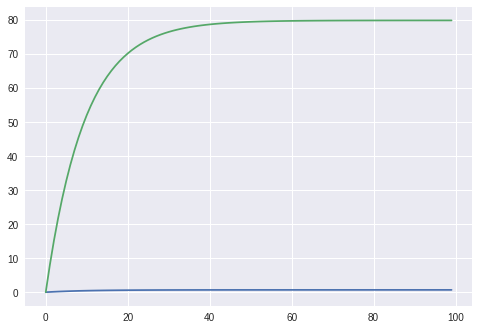

In [693]:
plt.plot(theta_list[:,0],label="Theta0")
plt.plot(theta_list[:,1],label="Theta1")

### Trajectory traced by theta updates in the loss function

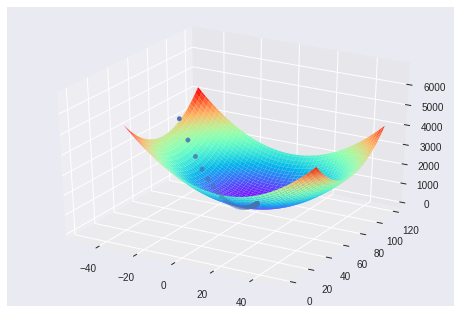

In [695]:
fig = plt.figure()
axes = fig.gca(projection="3d")
theta_list = np.array(theta_list)
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
axes.plot_surface(T0,T1,J,cmap="rainbow")
plt.show()

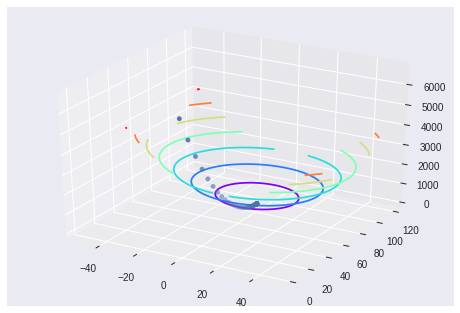

In [696]:
fig = plt.figure()
axes = fig.gca(projection="3d")
theta_list = np.array(theta_list)
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
axes.contour(T0,T1,J,cmap="rainbow")
plt.show()

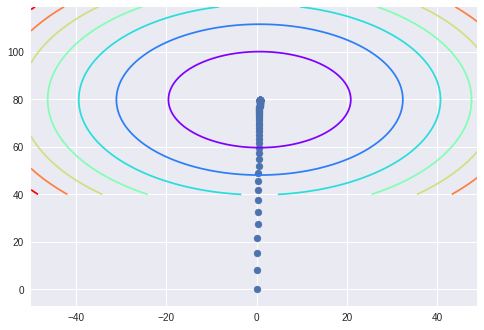

In [697]:
# 2d contour plot
plt.contour(T0,T1,J,cmap = "rainbow")
plt.scatter(theta_list[:,0],theta_list[:,1])

In [702]:
## animation plot
theta_list
np.save("ThetaList.npy",theta_list)

In [704]:
error_list

[6576.35005246196,
 5363.125102574931,
 4380.412893166487,
 3584.4160035456366,
 2939.658522952752,
 2417.404963672508,
 1994.3795806555281,
 1651.7290204117544,
 1374.1820666143055,
 1149.3690340383696,
 967.2704776518652,
 819.770646978796,
 700.2957841336078,
 603.5211452290067,
 525.1336877162773,
 461.6398471309694,
 410.20983625687,
 368.55152744884856,
 334.80829731435097,
 307.47628090540843,
 285.33734761416457,
 267.4048116482566,
 252.87945751587242,
 241.11392066864,
 231.5838358223823,
 223.86446709691373,
 217.61177842928484,
 212.54710060850397,
 208.4447115736724,
 205.1217764554589,
 202.43019900970543,
 200.25002127864602,
 198.48407731648712,
 197.05366270713802,
 195.8950268735658,
 194.95653184837263,
 194.19635087796493,
 193.58060429193594,
 193.08184955725244,
 192.67785822215873,
 192.35062524073192,
 192.08556652577707,
 191.87086896666273,
 191.69696394378104,
 191.55610087524585,
 191.4420017897342,
 191.34958153046787,
 191.2747211204641,
 191.2140841883591